In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [ ]:
# Считывание данных

sot = pd.read_csv('data\sotrudniki.csv', sep = ';')
rod = pd.read_csv('rodstvenniki.csv', sep = ';')
ogrv = pd.read_csv('data\OGRV.csv', sep = ';')

In [ ]:
sot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99214 entries, 0 to 99213
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hash_tab_num             99214 non-null  int64  
 1   date                     99214 non-null  object 
 2   date_of_birth            99214 non-null  int64  
 3   is_local                 99214 non-null  int64  
 4   gender                   99214 non-null  object 
 5   category                 97944 non-null  object 
 6   name_post_lvl4           66188 non-null  object 
 7   name_post_lvl5           54222 non-null  object 
 8   prof_post_augment        97944 non-null  object 
 9   razryad_post             99214 non-null  int64  
 10  name_fact_lvl4           66150 non-null  object 
 11  name_fact_lvl5           54188 non-null  object 
 12  prof_fact_augment        99214 non-null  object 
 13  razryad_fact             99214 non-null  int64  
 14  married               

In [ ]:
sot.describe()

,hash_tab_num,date_of_birth,is_local,razryad_post,razryad_fact,child_num,work_experience_company,work_experience_factory,work_experience_all,sick,home_to_work_distance,home_to_work_duration
count,99214.000000,99214.000000,99214.000000,99214.000000,99214.000000,99214.000000,91553.000000,91553.000000,91553.000000,99214.000000,89528.000000,89528.000000
mean,1065.272028,1979.519302,0.701453,3.460610,3.420485,0.969662,12.545913,12.523860,16.078982,0.118401,4694.404578,7.194537
std,648.786671,10.589874,0.457623,1.429009,1.482239,0.916404,10.723272,10.733127,11.075712,0.323084,841.232532,1.495198
min,0.000000,1944.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2463.800000,3.113333
25%,517.000000,1972.000000,0.000000,3.000000,3.000000,0.000000,2.000000,2.000000,6.000000,0.000000,4171.800000,6.463333
50%,1030.000000,1980.000000,1.000000,4.000000,4.000000,1.000000,11.000000,11.000000,15.000000,0.000000,4953.500000,7.230000
75%,1553.000000,1988.000000,1.000000,4.000000,4.000000,2.000000,21.000000,21.000000,25.000000,0.000000,5293.500000,8.136667
max,2652.000000,2001.000000,1.000000,6.000000,6.000000,6.000000,42.000000,42.000000,48.000000,1.000000,5995.300000,9.888333


In [ ]:
sot.child_num.value_counts()

0    36693
1    34429
2    23224
3     4311
4      428
5       92
6       37
Name: child_num, dtype: int64

In [ ]:
sot.married.value_counts()

жен/зм    48755
хол/нз    30173
разв.      6819
ГрБрак      760
вдов.       217
Name: married, dtype: int64

In [ ]:
sot.name_fact_lvl4.value_counts()

Отделение_8     14508
Отделение_1     13170
Отделение_2     11563
Отделение_6      7934
Отделение_5      6097
Отделение_3      4608
Отделение_11     2910
Отделение_4      2730
Отделение_7      1384
Отделение_10      880
Отделение_9       366
Name: name_fact_lvl4, dtype: int64

In [ ]:
sot.name_post_lvl5.value_counts()

передел 7     7606
передел 9     6844
передел 1     5879
передел 2     5828
передел 5     5660
передел 4     4427
передел 11    3716
передел 14    3288
передел 13    3040
передел 12    2279
передел 3     1571
передел 6      816
передел 17     564
передел 10     560
передел 8      551
передел 18     546
передел 15     437
передел 19     236
передел 20     212
передел 16     162
Name: name_post_lvl5, dtype: int64

In [ ]:
sot.name_post_lvl4.value_counts()

Отделение_8     14450
Отделение_1     13074
Отделение_2     11671
Отделение_6      7991
Отделение_5      6090
Отделение_3      4787
Отделение_11     2903
Отделение_4      2701
Отделение_7      1343
Отделение_10      857
Отделение_9       321
Name: name_post_lvl4, dtype: int64

In [ ]:
sot.category.value_counts()

Рабочие         92491
Руководители     3510
Специалисты      1837
Служащие          106
Name: category, dtype: int64

In [ ]:
sot.head()

,hash_tab_num,date,date_of_birth,is_local,gender,category,name_post_lvl4,name_post_lvl5,prof_post_augment,razryad_post,name_fact_lvl4,name_fact_lvl5,prof_fact_augment,razryad_fact,married,child_num,work_experience_company,work_experience_factory,work_experience_all,education,sick,home_to_work_distance,home_to_work_duration
0,0,2015-04-01,1985,1,мужской,Рабочие,NaN,NaN,Должность_0,3,NaN,NaN,Должность_0,3,хол/нз,1,9.0,9.0,10.0,Среднее(полное)общее,0,NaN,NaN
1,0,2015-05-01,1985,1,мужской,Рабочие,NaN,NaN,Должность_0,3,NaN,NaN,Должность_0,3,хол/нз,1,9.0,9.0,10.0,Среднее(полное)общее,0,NaN,NaN
2,0,2015-06-01,1985,1,мужской,Рабочие,NaN,NaN,Должность_0,3,NaN,NaN,Должность_0,3,хол/нз,1,9.0,9.0,10.0,Среднее(полное)общее,0,NaN,NaN
3,0,2015-07-01,1985,1,мужской,Рабочие,NaN,NaN,Должность_0,3,NaN,NaN,Должность_0,3,хол/нз,1,9.0,9.0,10.0,Среднее(полное)общее,0,NaN,NaN
4,0,2015-08-01,1985,1,мужской,Рабочие,NaN,NaN,Должность_0,3,NaN,NaN,Должность_0,3,хол/нз,1,9.0,9.0,10.0,Среднее(полное)общее,0,NaN,NaN


In [ ]:
age=sot.groupby('date_of_birth').sum().sick
age=pd.DataFrame(age)
age['num']=sot.groupby('date_of_birth').nunique().hash_tab_num
age['q']=age.sick/age.num


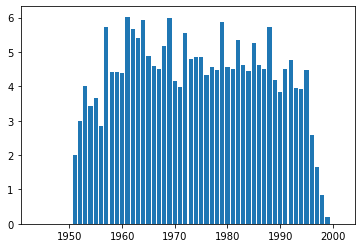

In [ ]:
plt.bar(age.index, age.q)
plt.show()

In [ ]:
name_post_lvl4=sot.groupby('name_post_lvl4').sum().sick
name_post_lvl4=pd.DataFrame(name_post_lvl4)
name_post_lvl4['num']=sot.groupby('name_post_lvl4').nunique().hash_tab_num
name_post_lvl4['q']=name_post_lvl4.sick/name_post_lvl4.num
name_post_lvl4

,sick,num,q
name_post_lvl4,,,
Отделение_1,1613,389,4.146530
Отделение_10,62,30,2.066667
Отделение_11,498,119,4.184874
Отделение_2,1322,333,3.969970
Отделение_3,760,166,4.578313
Отделение_4,340,104,3.269231
Отделение_5,474,159,2.981132
Отделение_6,1282,202,6.346535
Отделение_7,141,41,3.439024


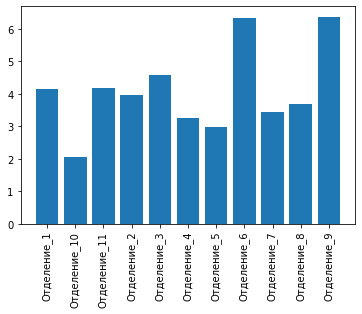

In [ ]:
plt.bar(name_post_lvl4.index, name_post_lvl4.q)
plt.xticks(rotation=90)
plt.show()

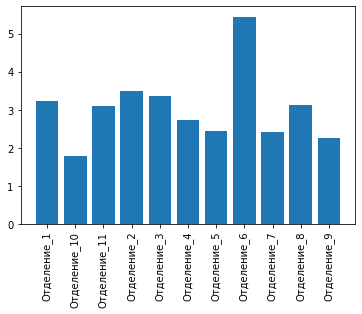

In [ ]:
exp=sot.groupby('name_fact_lvl4').sum().sick
exp=pd.DataFrame(exp)
exp['num']=sot.groupby('name_fact_lvl4').nunique().hash_tab_num
exp['q']=exp.sick/exp.num
plt.bar(exp.index, exp.q)
plt.xticks(rotation=90)
plt.show()

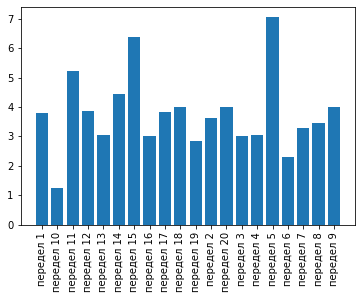

In [ ]:
exp=sot.groupby('name_post_lvl5').sum().sick
exp=pd.DataFrame(exp)
exp['num']=sot.groupby('name_post_lvl5').nunique().hash_tab_num
exp['q']=exp.sick/exp.num
plt.bar(exp.index, exp.q)
plt.xticks(rotation=90)
plt.show()

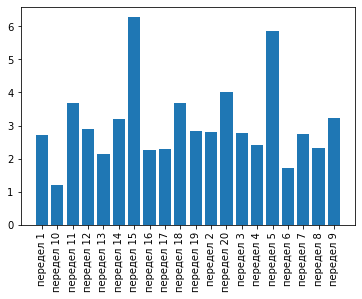

In [ ]:
exp=sot.groupby('name_fact_lvl5').sum().sick
exp=pd.DataFrame(exp)
exp['num']=sot.groupby('name_fact_lvl5').nunique().hash_tab_num
exp['q']=exp.sick/exp.num
plt.bar(exp.index, exp.q)
plt.xticks(rotation=90)
plt.show()

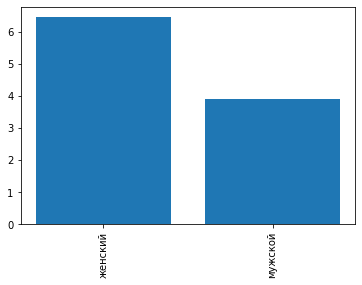

In [ ]:
exp=sot.groupby('gender').sum().sick
exp=pd.DataFrame(exp)
exp['num']=sot.groupby('gender').nunique().hash_tab_num
exp['q']=exp.sick/exp.num
plt.bar(exp.index, exp.q)
plt.xticks(rotation=90)
plt.show()

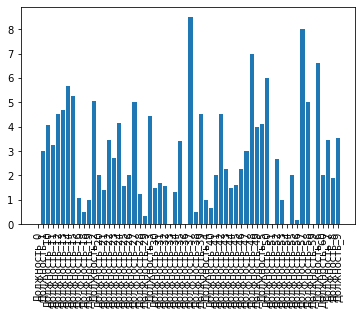

In [ ]:
exp=sot.groupby('prof_post_augment').sum().sick
exp=pd.DataFrame(exp)
exp['num']=sot.groupby('prof_post_augment').nunique().hash_tab_num
exp['q']=exp.sick/exp.num
plt.bar(exp.index, exp.q)
plt.xticks(rotation=90)
plt.show()

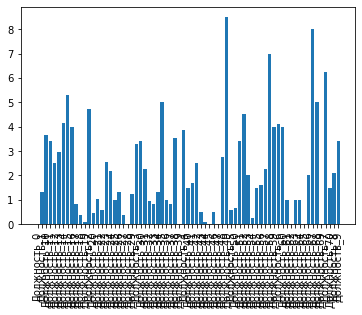

In [ ]:
exp=sot.groupby('prof_fact_augment').sum().sick
exp=pd.DataFrame(exp)
exp['num']=sot.groupby('prof_fact_augment').nunique().hash_tab_num
exp['q']=exp.sick/exp.num
plt.bar(exp.index, exp.q)
plt.xticks(rotation=90)
plt.show()

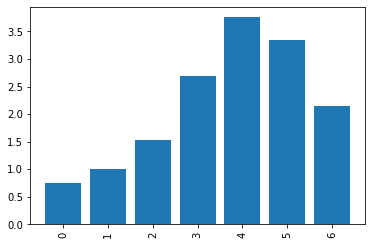

In [ ]:
exp=sot.groupby('razryad_post').sum().sick
exp=pd.DataFrame(exp)
exp['num']=sot.groupby('razryad_post').nunique().hash_tab_num
exp['q']=exp.sick/exp.num
plt.bar(exp.index, exp.q)
plt.xticks(rotation=90)
plt.show()


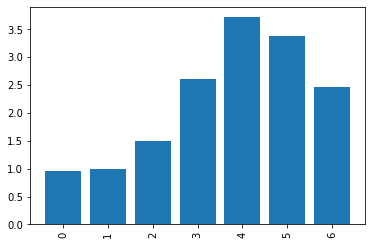

In [ ]:
exp=sot.groupby('razryad_fact').sum().sick
exp=pd.DataFrame(exp)
exp['num']=sot.groupby('razryad_post').nunique().hash_tab_num
exp['q']=exp.sick/exp.num
plt.bar(exp.index, exp.q)
plt.xticks(rotation=90)
plt.show()

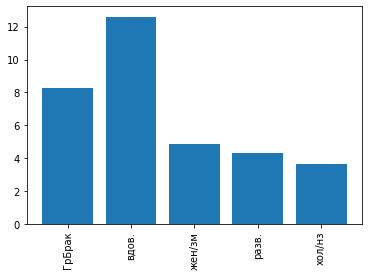

In [ ]:
exp=sot.groupby('married').sum().sick
exp=pd.DataFrame(exp)
exp['num']=sot.groupby('married').nunique().hash_tab_num
exp['q']=exp.sick/exp.num
plt.bar(exp.index, exp.q)
plt.xticks(rotation=90)
plt.show()


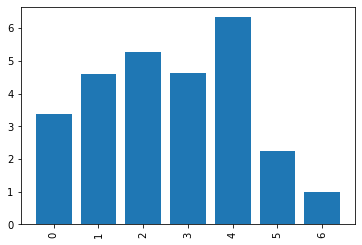

In [ ]:
exp=sot.groupby('child_num').sum().sick
exp=pd.DataFrame(exp)
exp['num']=sot.groupby('child_num').nunique().hash_tab_num
exp['q']=exp.sick/exp.num
plt.bar(exp.index, exp.q)
plt.xticks(rotation=90)
plt.show()

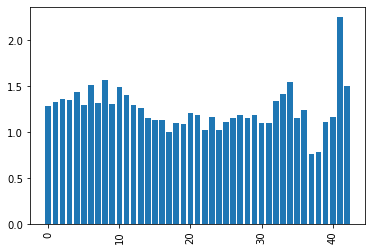

In [ ]:
exp=sot.groupby('work_experience_company').sum().sick
exp=pd.DataFrame(exp)
exp['num']=sot.groupby('work_experience_company').nunique().hash_tab_num
exp['q']=exp.sick/exp.num
plt.bar(exp.index, exp.q)
plt.xticks(rotation=90)
plt.show()

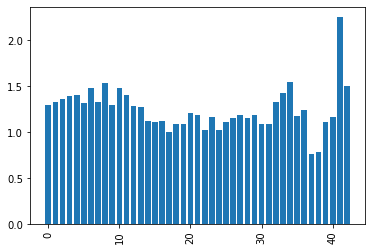

In [ ]:
exp=sot.groupby('work_experience_factory').sum().sick
exp=pd.DataFrame(exp)
exp['num']=sot.groupby('work_experience_factory').nunique().hash_tab_num
exp['q']=exp.sick/exp.num
plt.bar(exp.index, exp.q)
plt.xticks(rotation=90)
plt.show()

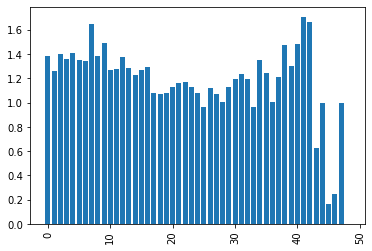

In [ ]:
exp=sot.groupby('work_experience_all').sum().sick
exp=pd.DataFrame(exp)
exp['num']=sot.groupby('work_experience_all').nunique().hash_tab_num
exp['q']=exp.sick/exp.num
plt.bar(exp.index, exp.q)
plt.xticks(rotation=90)
plt.show()

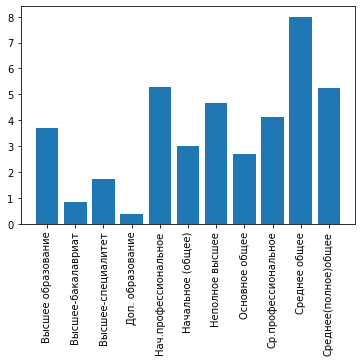

In [ ]:

exp=sot.groupby('education').sum().sick
exp=pd.DataFrame(exp)
exp['num']=sot.groupby('education').nunique().hash_tab_num
exp['q']=exp.sick/exp.num
plt.bar(exp.index, exp.q)
plt.xticks(rotation=90)
plt.show()

In [ ]:
durations=sot.describe().home_to_work_duration[4:].tolist()
durations

[6.463333333333334, 7.23, 8.136666666666667, 9.888333333333332]

In [ ]:
sot.describe().home_to_work_duration

count    89528.000000
mean         7.194537
std          1.495198
min          3.113333
25%          6.463333
50%          7.230000
75%          8.136667
max          9.888333
Name: home_to_work_duration, dtype: float64

In [ ]:
sot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99214 entries, 0 to 99213
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hash_tab_num             99214 non-null  int64  
 1   date                     99214 non-null  object 
 2   date_of_birth            99214 non-null  int64  
 3   is_local                 99214 non-null  int64  
 4   gender                   99214 non-null  object 
 5   category                 97944 non-null  object 
 6   name_post_lvl4           66188 non-null  object 
 7   name_post_lvl5           54222 non-null  object 
 8   prof_post_augment        97944 non-null  object 
 9   razryad_post             99214 non-null  int64  
 10  name_fact_lvl4           66150 non-null  object 
 11  name_fact_lvl5           54188 non-null  object 
 12  prof_fact_augment        99214 non-null  object 
 13  razryad_fact             99214 non-null  int64  
 14  married               

In [ ]:
duration=pd.DataFrame(sot.groupby('hash_tab_num').mean().home_to_work_duration)
duration['quant']=0
duration.loc[duration.home_to_work_duration<durations[0], 'quant']=1
duration.loc[(duration.home_to_work_duration>=durations[0])&(duration.home_to_work_duration<durations[1]), 'quant']=2
duration.loc[(duration.home_to_work_duration>=durations[1])&(duration.home_to_work_duration<durations[2]), 'quant']=3
duration.loc[(duration.home_to_work_duration>=durations[2]), 'quant']=4
duration['sick']=sot.groupby('hash_tab_num').sum().sick
duration['counter']=1
quant=duration.groupby('quant').sum()
quant['q']=quant.sick/quant.counter
quant

,home_to_work_duration,sick,counter,q
quant,,,,
0,0.000000,1010,363,2.782369
1,2955.491667,2750,576,4.774306
2,3751.320000,2634,546,4.824176
3,4468.640000,2683,578,4.641869
4,5333.646667,2670,590,4.525424


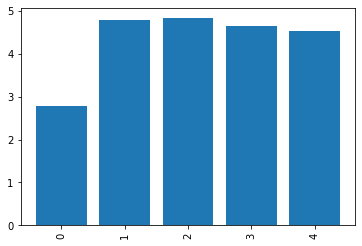

In [ ]:
plt.bar(quant.index, quant.q)
plt.xticks(rotation=90)
plt.show()

In [ ]:
durations=sot.describe().home_to_work_distance[4:].tolist()
durations

[4171.8, 4953.5, 5293.5, 5995.3]

In [ ]:
duration=pd.DataFrame(sot.groupby('hash_tab_num').mean().home_to_work_distance)
duration['quant']=0
duration.loc[duration.home_to_work_distance<durations[0], 'quant']=1
duration.loc[(duration.home_to_work_distance>=durations[0])&(duration.home_to_work_distance<durations[1]), 'quant']=2
duration.loc[(duration.home_to_work_distance>=durations[1])&(duration.home_to_work_distance<durations[2]), 'quant']=3
duration.loc[(duration.home_to_work_distance>=durations[2]), 'quant']=4
duration['sick']=sot.groupby('hash_tab_num').sum().sick
duration['counter']=1
quant=duration.groupby('quant').sum()
quant['q']=quant.sick/quant.counter
quant

,home_to_work_distance,sick,counter,q
quant,,,,
0,0.0,1010,363,2.782369
1,1986440.7,2795,584,4.785959
2,1926449.9,1799,412,4.366505
3,2932366.6,2869,582,4.929553
4,3909956.3,3274,712,4.598315


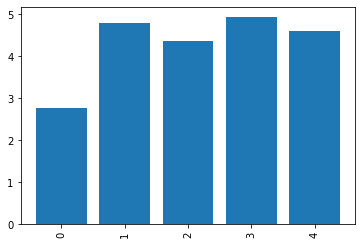

In [ ]:
plt.bar(quant.index, quant.q)
plt.xticks(rotation=90)
plt.show()

1. Совсем взрослые сотрудники (70+) и совем молодые(<23) берут больничные реже

3. name_post_lvl4 во втором отделении берут редко, в 9 и 6 чаще всего
4. name_post_lvl5 gthtltk 10 - берут в 2 раза реже среднего, в 15 и 5 - в 2 раза чаще
5. prof_post_augment влияет очень сильно, нужно скластеризовать хай и лоу рискам, так как их много
6. razryad_post влияет сильно, возможно это скореллировано с возрастом. можно сгруппировать по 0-2 и 3-6
7. married вдов сильно влияет, эту категорию точно включать
8. child_num люди без детей берут гораздо реже
9. Опыт работы в целом не сильно влияет имхо
10. education проф образование кластеризовать и в фичи, оно влияет из-за типа работы